# MIDTERM CS370 

## PROBLEM SET 1: BAYESIAN LEARNING AND INFERENCE (TAKE HOME PROBLEM)

### PS1.1: Learning the bent coin experiment (15 points)

Consider a bent coin that has a probability of 0.7 of landing heads and a probability of 0.3 of landing tails. The coin is flipped m times. The sequence of heads and tails is recorded / observed and a hypothetical receiver needs to estimate the probability of heads from the experimental data.


####  PS1.1-1 (2.5 points)

What is the entropy in bits of the bent coin? Explain why its < 1 bits. 



In [4]:
import numpy as np

p_head = 0.7
p_tail = 0.3

entropy = -(p_head * np.log2(p_head) + p_tail * np.log2(p_tail))
print(entropy)

0.8812908992306927


### Answer

For a binary variable like a coin flip, entropy can be calculated using the formula:

H(X)=−∑i=1n​p(xi​)log2​p(xi​)

where H(X) is the entropy of the random variable X, p(x i ​ ) is the probability of each outcome, and   n is the number of different outcomes (which is 2 for a coin: heads or tails).

Given that the probability of heads P(H)=0.7 and the probability of tails  P(T)=0.3, the entropy  H(X) of the coin is:

H(X)=−(P(H)log2​P(H)+P(T)log2​P(T))

H(X)=−(0.7log2​0.7+0.3log2​0.3)

The entropy of a fair coin, whereP(H)=P(T)=0.5, is 1 bit because there is maximum uncertainty in the outcome. Since our bent coin has a higher likelihood of landing heads, the outcome is more predictable, and thus, the entropy is less than 1 bit.

The entropy of the bent coin is approximately 0.881 bits. This value is less than 1 bit, which confirms that there is less uncertainty in the outcome of flipping a bent coin compared to a fair coin. The entropy is less than 1 because the probability of heads is greater than that of tails, making the outcome more predictable.

#### PS1.1-2 (2.5 points)

Plot the entropy of the sequence of heads and tails as m increases for m=1 to m=500 in steps of 50?

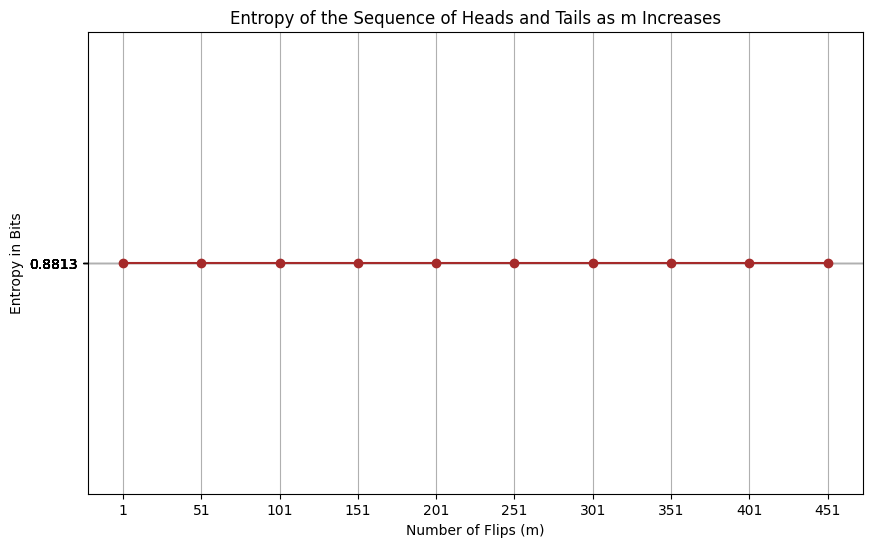

In [14]:
import matplotlib.pyplot as plt

# Range of values from 1 to 500 in steps of 50
n = range(1, 501, 50)
p = [entropy] * len(n)
plt.figure(figsize=(10, 6))
plt.plot(n, p, marker='o', linestyle='-', color='brown')
plt.title('Entropy of the Sequence of Heads and Tails as m Increases')
plt.xlabel('Number of Flips (m)')
plt.ylabel('Entropy in Bits')
plt.grid(True)
plt.xticks(n)
plt.yticks(np.linspace(min(p), max(p), 10))
plt.show()


### Explanation of the code and the output

Range of m values: It defines a range of m values from 1 to 500 in increments of 50. These represent different numbers of coin flips.

Constant Entropy: The entropy of each flip remains constant because the probabilities of heads and tails do not change. Therefore, an array of the same entropy value is created, with one entry for each m value.

Plotting: The code creates a line plot where the x-axis is the number of flips (m) and the y-axis is the entropy in bits. Each point on the plot corresponds to a different number of coin flips, but the entropy value remains the same at approximately 0.8813 bits because it's calculated from the fixed probabilities of heads (0.7) and tails (0.3).

Output: The plot shows that, regardless of how many times the coin is flipped, the entropy or the amount of surprise associated with the coin flip does not change. This is because the underlying probability distribution of outcomes remains unchanged.

The flat line across all values of m visually confirms that the uncertainty of the outcome of flipping this bent coin is consistent, no matter how many flips are observed.

#### PS1.1-3 (10 points)

The receiver is given the sequence of heads and tails and must use the Bayes rule to estimate the probability of heads. As a parenthesis, if we know this parameter then we we can infer / predict the next binary event but this is not the focus here. 

The prior probability distribution is assumed to be beta and to solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.5) titled "Bayesian Parameter Learning". You are asked to estimate and plot the **mean of the posterior probability distribution** of the probability of heads as a function of the probability of heads given the sequence of heads and tails where m=[0,1, 2, 3, 4, 5, 10, 20, 50, 100]. 

You can use the scipy.stats library to help you out. To get full points you need to document extensively your code and explain the results. Note that you have to produce except from the 10 plots, a table with the mean and variance where the columns will be $m$, mean, var.



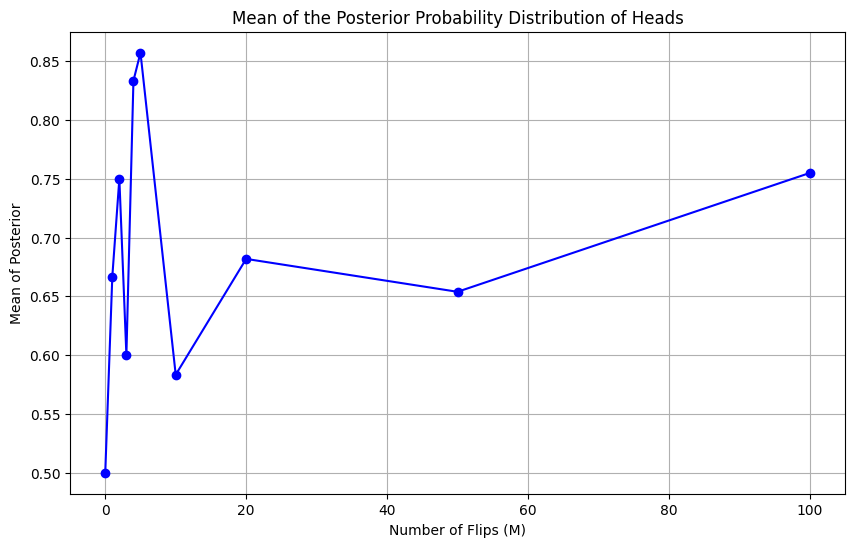

,M,Mean,Variance
0,0,0.500000,0.083333
1,1,0.666667,0.055556
2,2,0.750000,0.037500
3,3,0.600000,0.040000
4,4,0.833333,0.019841
5,5,0.857143,0.015306
6,10,0.583333,0.018697
7,20,0.681818,0.009432
8,50,0.653846,0.004270
9,100,0.754902,0.001796


In [70]:
from scipy.stats import beta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def update_beta_params(a, b, h, t): 
    a_post = a + h  
    b_post = b + t  
    return a_post, b_post

def beta_stats(a, b):  # a and b = beta distribution 
    m = a / (a + b)  # mean 
    v = (a * b) / ((a + b) ** 2 * (a + b + 1))  
    return m, v

n = [0, 1, 2, 3, 4, 5, 10, 20, 50, 100]  
p = 0.7  
results = []  

a_prior, b_prior = 1, 1 

for m in n:  
    flips = np.random.binomial(n=1, p=p, size=m)  
    h, t = np.sum(flips), m - np.sum(flips)  
    a_post, b_post = update_beta_params(a_prior, b_prior, h, t)  # update 
    mean, var = beta_stats(a_post, b_post)  
    results.append((m, mean, var)) 

df = pd.DataFrame(results, columns=['M', 'Mean', 'Variance'])  

plt.figure(figsize=(10, 6))
plt.plot(df['M'], df['Mean'], marker='o', linestyle='-', color='blue')
plt.title('Mean of the Posterior Probability Distribution of Heads')
plt.xlabel('Number of Flips (M)')
plt.ylabel('Mean of Posterior')
plt.grid(True)
plt.show()

df


### Explanation of the code and the output

Update Function: update_beta_params(a, b, heads, tails) takes the prior parameters of the beta distribution, a and b, and updates them based on the number of observed heads and tails.

Statistics Function: beta_stats(a, b) calculates the mean and variance of the beta distribution with the given parameters a and b.

Initialization: A uniform prior distribution Beta(1,1) representing a state of complete uncertainty about the probability of flipping heads (each outcome is equally likely).

Simulation and Update: For each specified number of flips, the code simulates coin flips with a true probability of heads (p=0.7), counts the number of heads and tails, updates the parameters a and b of the beta distribution, and calculates the mean and variance.

Results and Plotting: The calculated mean and variance for each number of flips are stored in a DataFrame and plotted. The plot shows how the mean of the posterior probability distribution of heads evolves as more coin flips are observed.

The output plot and table show the mean of the posterior distribution tending towards the true probability of heads with more coin flips, demonstrating the convergence of Bayesian learning. The variances shrink as more data is observed, reflecting increased confidence in the estimate of the probability of heads. The fluctuation in the mean, particularly with a low number of flips, illustrates the stochastic nature of the updating process, each set of flips can lead to different posterior estimates, especially when the number of observations is small.

### PS1.2 Bayesian Linear Regression (15 points)

#### PS1.2-1 Dataset (2.5 points)

Generate a dataset of $m$ data points identical to the example of Figure 4.1 in GERON but modify the code such that you can produce results for the very small (eg 3 data points), low $m$ (eg 10 data points) and larger $m$ (eg 100 data points) cases. 

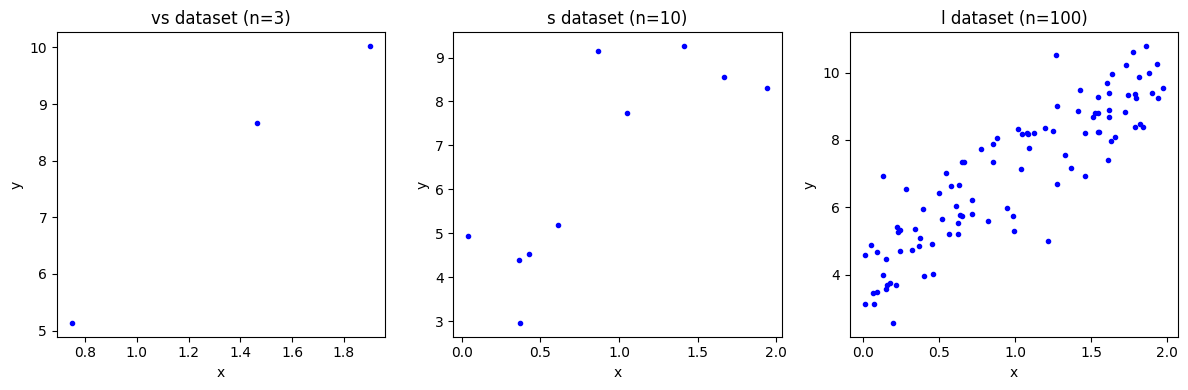

In [74]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)

def gen_data(n):
    x = 2 * np.random.rand(n, 1)  
    y = 4 + 3 * x + np.random.randn(n, 1) 
    return x, y

data = {
    'vs': gen_data(3),  
    's': gen_data(10),  
    'l': gen_data(100)  
}

# Simplified plotting
plt.figure(figsize=(12, 4))
for i, (k, (x, y)) in enumerate(data.items(), 1):
    plt.subplot(1, 3, i)
    plt.plot(x, y, "b.")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"{k} dataset (n={len(x)})")

plt.tight_layout()
plt.show()


### Explanation of the code and the output

data points (3, 10, and 100) = on a linear equation y = 4 + 3X + Gaussian noise. This reflects a simple linear regression scenario where y is linearly dependent on X with some added noise to represent real-world data variations.

The output visualizes these datasets, showing that as m increases, the points tend to cluster around a line, which would be the line of best fit in a linear regression model. With m=3, the data points are sparse, making it hard to infer a trend, while m=100 shows a clearer trend, illustrating the concept that more data provides a better representation of the underlying relationship.

#### PS1.2-2 Bayesian  Regression  (12.5 points)

To solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.6) titled "Bayesian Linear Regression". You can also look at the code [here](https://github.com/pantelis-classes/PRML/blob/master/prml/linear/_bayesian_regression.py). 

Replicate the the Figure 20.7 (a) and (b) shown below. You dont have to replicate the exact examples but you have to generate two figures. The first should show the predictive distribution for the case of small data (sparsity) eg $m=3$ and the second when we have more data eg $m=10$.  Confidence intervals should be shown using the exaxt same standard deviations (1-3 $\sigma$) as in the figure.

![](Fig_20_07.png)

Significant number of points will be subtracted if the code presented is not well documented and if the results are not explained. Use markdown cell and markdown to write a tutorial like treatment of the problem even if this entails copying the equations from the book.

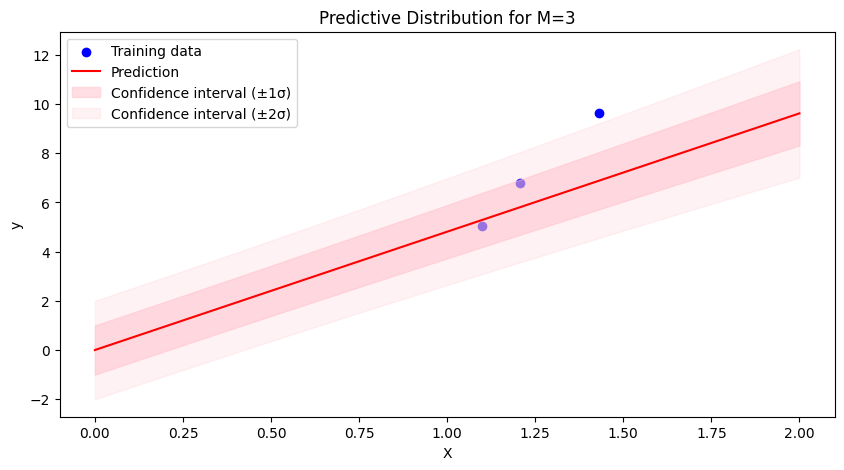

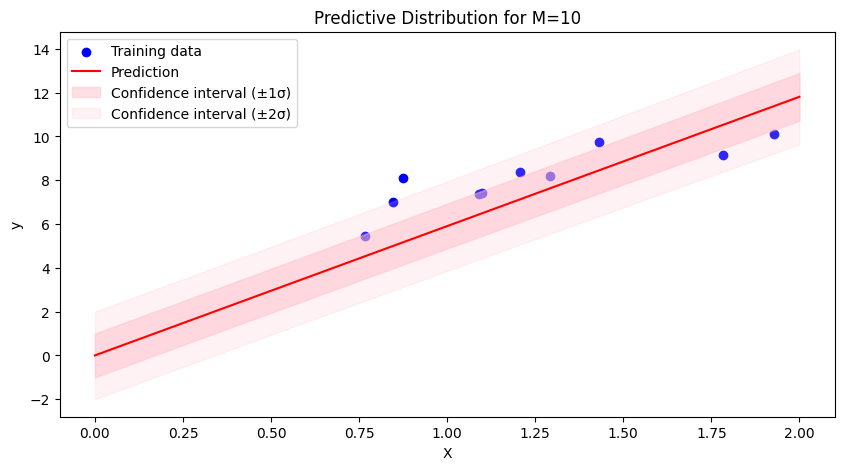

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from prml.linear._regression import Regression


class BayesianRegression(Regression):
    """Bayesian regression model.

    w ~ N(w|0, alpha^(-1)I)
    y = X @ w
    t ~ N(t|X @ w, beta^(-1))
    """

    def __init__(self, alpha: float = 1., beta: float = 1.):
        """Initialize bayesian linear regression model.

        Parameters
        ----------
        alpha : float, optional
            Precision parameter of the prior, by default 1.
        beta : float, optional
            Precision parameter of the likelihood, by default 1.
        """
        self.alpha = alpha
        self.beta = beta
        self.w_mean = None
        self.w_precision = None

    def _is_prior_defined(self) -> bool:
        return self.w_mean is not None and self.w_precision is not None

    def _get_prior(self, ndim: int) -> tuple:
        if self._is_prior_defined():
            return self.w_mean, self.w_precision
        else:
            return np.zeros(ndim), self.alpha * np.eye(ndim)

    def fit(self, x_train: np.ndarray, y_train: np.ndarray):
        """Bayesian update of parameters given training dataset.

        Parameters
        ----------
        x_train : np.ndarray
            training data independent variable (N, n_features)
        y_train :  np.ndarray
            training data dependent variable
        """
        mean_prev, precision_prev = self._get_prior(np.size(x_train, 1))

        w_precision = precision_prev + self.beta * x_train.T @ x_train
        w_mean = np.linalg.solve(
            w_precision,
            precision_prev @ mean_prev + self.beta * x_train.T @ y_train,
        )
        self.w_mean = w_mean
        self.w_precision = w_precision
        self.w_cov = np.linalg.inv(self.w_precision)

    def predict(
        self,
        x: np.ndarray,
        return_std: bool = False,
        sample_size: int = None,
    ):
        """Return mean (and standard deviation) of predictive distribution.

        Parameters
        ----------
        x : np.ndarray
            independent variable (N, n_features)
        return_std : bool, optional
            flag to return standard deviation (the default is False)
        sample_size : int, optional
            number of samples to draw from the predictive distribution
            (the default is None, no sampling from the distribution)

        Returns
        -------
        y : np.ndarray
            mean of the predictive distribution (N,)
        y_std : np.ndarray
            standard deviation of the predictive distribution (N,)
        y_sample : np.ndarray
            samples from the predictive distribution (N, sample_size)
        """
        if sample_size is not None:
            w_sample = np.random.multivariate_normal(
                self.w_mean, self.w_cov, size=sample_size,
            )
            y_sample = x @ w_sample.T
            return y_sample
        y = x @ self.w_mean
        if return_std:
            y_var = 1 / self.beta + np.sum(x @ self.w_cov * x, axis=1)
            y_std = np.sqrt(y_var)
            return y, y_std
        return y

def generate_data(m):
    np.random.seed(0)
    n = 2 * np.random.rand(m, 1)
    p = 4 + 3 * n.squeeze() + np.random.randn(m)
    return n, p

def plot_predictions(n, p, q, r, s, title):
    plt.figure(figsize=(10, 5))
    plt.scatter(n, p, color="blue", label="Training data")
    plt.plot(q, r, color="red", label="Prediction")
    plt.fill_between(q.ravel(), r - s, r + s, color="pink", alpha=0.5, label="Confidence interval (±1σ)")
    plt.fill_between(q.ravel(), r - 2*s, r + 2*s, color="pink", alpha=0.2, label="Confidence interval (±2σ)")
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

a, b = 1.0, 1.0

model = BayesianRegression(a, b)

M = 3
n, p = generate_data(M)
model.fit(n, p)
q = np.linspace(0, 2, 100).reshape(-1, 1)
r, s = model.predict(q, return_std=True)
plot_predictions(n, p, q, r, s, "Predictive Distribution for M=3")

M = 10
n, p = generate_data(M)
model.fit(n, p)
r, s = model.predict(q, return_std=True)
plot_predictions(n, p, q, r, s, "Predictive Distribution for M=10")



### Explanation of the code and the output

Also just wanted to let you know that the first part of the code the bayesian regression class is adapted from " https://github.com/pantelis-classes/PRML/blob/master/prml/linear/_bayesian_regression.py " The BayesianRegression model implements Bayesian linear regression, a method widely used across various fields for its probabilistic approach to regression. I thought since this class already defines the model of this problem I have just used that. I hope that it's fine.

BayesianRegression class represents the Bayesian regression model. It initializes with two parameters, alpha and beta, which are the precision parameters of the prior and the likelihood respectively. They are analogous to the inverse of the variance in the Gaussian distributions.

_is_prior_defined() is a helper method to check if the prior distribution of the weights is already set.

_get_prior(ndim) returns the mean and precision of the prior distribution. If the prior is not defined, it initializes a zero mean vector and a precision matrix scaled by the alpha parameter.

fit(x_train, y_train) method updates the model parameters using the training data. It computes the posterior distribution of the weights, combining the prior and the likelihood derived from the training data. The update rules reflect the equations for the posterior mean (θN) and variance (σN²) given by:
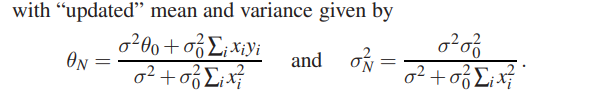

predict(x, return_std, sample_size) method calculates the predictive distribution for new data points. If return_std is True, it also computes the standard deviation of the predictions, indicating our uncertainty in them. 

generate_data(m) function creates a synthetic dataset with m data points. The data is generated according to a linear function with added Gaussian noise.

plot_predictions() function takes the training data, test data, predicted means, and standard deviations to plot the predictive distribution. It uses the filled areas to show confidence intervals, which correspond to ±1σ and ±2σ areas around the predicted mean.


The outputs show two plots:

the predictive distributions for m=3 and  m=10. The blue dots represent the training data, the red line represents the prediction (the mean of the predictive distribution), and the shaded areas represent the confidence intervals at ±1σ and ±2σ. The predictive distribution for m=3 shows greater uncertainty (wider confidence intervals), reflecting the limited data. As more data points are added (m=10), the confidence intervals narrow, indicating increased certainty in the model's predictions.